# 机器学习纳米学位
## 毕业设计

----
## 一、项目概述

### 1.1 声音性别识别

数据集来源于kaggle上的一个数据竞赛，这个数据集包含3168个样本，其中50%为男性，50%为女性。数据是已经经过处理的声音信息，包括声音的各种信息的统计量。

### 1.2 问题说明

使用机器学习的方法判断一段音频信号是男性还是女性。

----
## 二、 输入数据

### 2.1 声音特征预览

In [1]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

In [2]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # 允许为DataFrame使用display()

# 导入附加的可视化代码visuals.py
import visuals as vs

# 为notebook提供更加漂亮的可视化
%matplotlib inline

# 导入人口普查数据
data = pd.read_csv("voice.csv")

# 成功 - 显示第一条记录
display(data.head(n=1))

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.0,0.0,male


总共包涵21个声音特征。

### 2.2、数量总览
对数据集进行一个粗略的探索，看看有多少声音来自于男生，多少声音来自于女声。

In [3]:
# TODO：总的记录数
n_records = data.shape[0]

# TODO：被调查者的收入大于$50,000的人数
male_amount = data[data.label == 'male'].shape[0]

# TODO：被调查者的收入最多为$50,000的人数
female_amount = data[data.label == 'female'].shape[0]

# TODO：被调查者收入大于$50,000所占的比例
male_percent =100* float(male_amount)/n_records

# 打印结果
print "Total number of records: {}".format(n_records)
print "male amount: {}".format(male_amount)
print "female amount0: {}".format(female_amount)
print "Percentage of male: {:.2f}%".format(male_percent)

Total number of records: 3168
male amount: 1584
female amount0: 1584
Percentage of male: 50.00%


### 获得特征和标签
`label` 列作为标签列单独存放。

In [4]:
# 将数据切分成特征和对应的标签
label_raw = data['label']
features_raw = data.drop('label', axis = 1)

### 2.3、探索数据分布

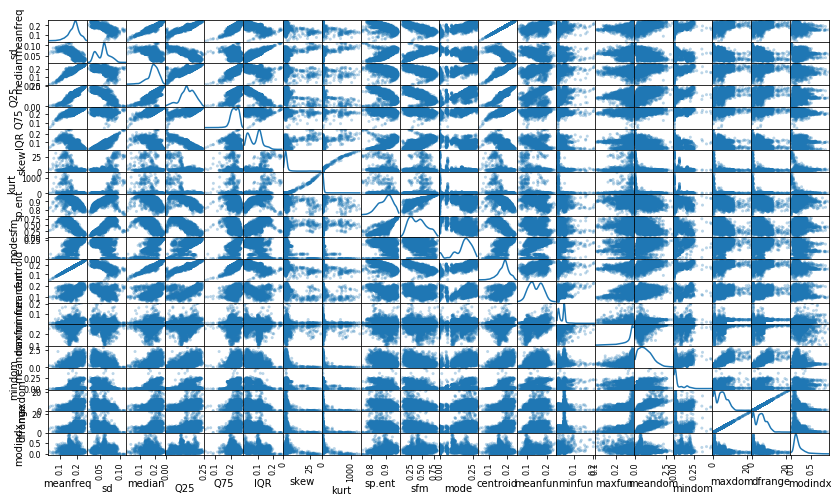

In [5]:
# 对于数据中的每一对特征构造一个散布矩阵
pd.plotting.scatter_matrix(features_raw, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

----
## 三、准备数据


### 3.1 数据预处理
 - 将目标标签`'label'`转换成数字项。
   - 将"male"转换成`1`；将"female"转换成`0`。

In [6]:
# TODO：将'lable_raw'编码成数字值
label = label_raw.replace({"male":1, "female":0})
features = features_raw

### 3.2 混洗和切分数据
现在所有的 _类别变量_ 已被转换成数值特征，而且所有的数值特征已被规一化。和我们一般情况下做的一样，现在将数据（包括特征和它们的标签）切分成训练和测试集。其中80%的数据将用于训练和20%的数据用于测试。然后再进一步把训练数据分为训练集和验证集，用来选择和优化模型。

In [7]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将'features'和'income'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 0,
                                                    stratify = label)
# 将'X_train'和'y_train'进一步切分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0,
                                                    stratify = y_train)

# 显示切分的结果
print "Training set has {} samples.".format(X_train.shape[0])
print "Validation set has {} samples.".format(X_val.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 2027 samples.
Validation set has 507 samples.
Testing set has 634 samples.


----
## 四、训练模型
在这一部分中，本文将尝试四种不同的算法，并确定哪一个能够最好地建模数据。
- 随机森林 (Random Forest)
- 支撑向量机 (SVM)
- Logistic回归（LogisticRegression）
- 深度神经网络（DNN）

### 4.1 创建一个训练和预测的流水线
在下面的代码单元实现以下功能：

 - 从[`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)中导入`fbeta_score`和`accuracy_score`。
 - 用训练集拟合学习器，并记录训练时间。
 - 对训练集的前300个数据点和验证集进行预测并记录预测时间。
 - 计算预测训练集的前300个数据点的准确率和F-score。
 - 计算预测验证集的准确率和F-score。

In [8]:
# TODO：从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score


def train_predict(learner, sample_size, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_val: features validation set
       - y_val: income validation set
    '''
    
    results = {}
    
    # TODO：使用sample_size大小的训练数据来拟合学习器
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # 获得程序开始时间
    
    learner.fit(X_train[0: sample_size], y_train[0: sample_size])
    end = time() # 获得程序结束时间
    
    # TODO：计算训练时间
    results['train_time'] = end - start
    
    # TODO: 得到在验证集上的预测值
    #       然后得到对前300个训练数据的预测结果
    start = time() # 获得程序开始时间
    predictions_val = learner.predict(X_val)
    predictions_train = learner.predict(X_train[0:300])
    end = time() # 获得程序结束时间
    
    # TODO：计算预测用时
    results['pred_time'] = end - start
            
    # TODO：计算在最前面的300个训练数据的准确率
    results['acc_train'] = accuracy_score(y_train[0:300], predictions_train)
        
    # TODO：计算在验证上的准确率
    results['acc_val'] = accuracy_score(y_val, predictions_val)
    
    # TODO：计算在最前面300个训练数据上的F-score
    results['f_train'] = fbeta_score(y_train[0:300], predictions_train, beta=0.5)
        
    # TODO：计算验证集上的F-score
    results['f_val'] = fbeta_score(y_val, predictions_val,beta=0.5)
       
    # 成功
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # 返回结果
    return results

### 4.2 三个机器学习训练以及模型的评估
在下面的代码单元中，实现以下功能：             
- 导入了在前面讨论的三个监督学习模型。             
- 初始化了三个模型并存储在`'clf_A'`，`'clf_B'`和`'clf_C'`中。
  - 使用模型的默认参数值，在接下来的部分中你将需要对某一个模型的参数进行调整。             
  - 设置`random_state` （方便方便调试）。       
- 计算1%， 10%， 100%的训练数据分别对应多少个数据点，并将这些值存储在`'samples_1'`, `'samples_10'`, `'samples_100'`中

RandomForestClassifier trained on 20 samples.
RandomForestClassifier trained on 202 samples.
RandomForestClassifier trained on 2027 samples.
SVC trained on 20 samples.
SVC trained on 202 samples.
SVC trained on 2027 samples.
LogisticRegression trained on 20 samples.
LogisticRegression trained on 202 samples.
LogisticRegression trained on 2027 samples.


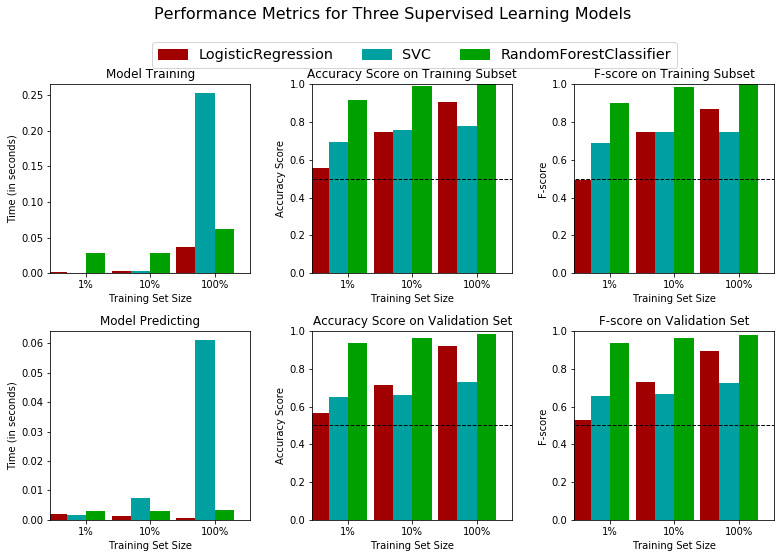

In [9]:
# TODO：从sklearn中导入三个监督学习模型
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# TODO：初始化三个模型
clf_A = RandomForestClassifier(n_estimators=10,random_state=10)
clf_B = SVC(random_state=8)
clf_C = LogisticRegression(random_state=10)

# TODO：计算1%， 10%， 100%的训练数据分别对应多少点
n_train_records = y_train.shape[0]
samples_1 = int(0.01 * n_train_records)
samples_10 = int(0.1 * n_train_records)
samples_100 = int( 1 * n_train_records)

# 收集学习器的结果
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_val, y_val)

# 对选择的三个模型得到的评价结果进行可视化
vs.evaluate(results, 0.5, 0.5)

----
## 4.3 提高效果

选择表现最好的随机森林模型来提高效果。使用网格搜索来至少调整模型的重要参数。接下来的代码单元中实现以下功能：

- 导入`sklearn.model_selection.GridSearchCV` 和 `sklearn.metrics.make_scorer`.
- 初始化选择的分类器，并将其存储在`clf`中。
 - 设置`random_state`。
- 创建一个对于这个模型你希望调整参数的字典。
 - 例如: parameters = {'parameter' : [list of values]}。
- 使用`make_scorer`来创建一个`fbeta_score`评分对象（设置$\beta = 0.5$）。
- 在分类器clf上用'scorer'作为评价函数运行网格搜索，并将结果存储在grid_obj中。
- 用训练集（X_train, y_train）训练grid search object,并将结果存储在`grid_fit`中。

In [10]:
# TODO：导入'GridSearchCV', 'make_scorer'和其他一些需要的库
# import sklearn.model_selection.GridSearchCV, KFold

# import sklearn.metrics.make_scorer
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import make_scorer, fbeta_score, accuracy_score

# TODO：初始化分类器
clf = RandomForestClassifier(random_state=10)

# TODO：创建你希望调节的参数列表
parameters = {'n_estimators': range(5, 40)}

# TODO：创建一个fbeta_score打分对象
scorer  = make_scorer(fbeta_score, beta=0.5)

# TODO：在分类器上使用网格搜索，使用'scorer'作为评价函数

kfold = KFold(n_splits=10)
grid_obj = GridSearchCV(clf, parameters, scorer, cv=kfold)

# TODO：用训练数据拟合网格搜索对象并找到最佳参数
grid_obj.fit(X_train, y_train)
# 得到estimator
best_clf = grid_obj.best_estimator_

# 使用没有调优的模型做预测
predictions = clf_A.predict(X_val)
best_predictions = best_clf.predict(X_val)


# 汇报调参前和调参后的分数
print "Unoptimized model\n------"
print "Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions))
print "F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions))
print "Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on validation data: 0.9822
F-score on validation data: 0.9811

Optimized Model
------
Final accuracy score on the validation data: 0.9822
Final F-score on the validation data: 0.9811


### 4.4 使用DNN识别

In [35]:
from keras.layers import *
from keras.models import *

import numpy as np
import os
from keras.optimizers import *

print X_train.shape
input_shape=(X_train.shape[1],)
act = 'relu'

input_layer = Input(shape=input_shape, name='the_input')
inner = Dense(128, kernel_initializer='random_normal', name='dense1')(input_layer)
inner = Activation(act)(inner)
inner = Dropout(0.2)(inner)
inner = Dense(256, kernel_initializer='random_normal', name='dense2')(inner)
inner = Activation(act)(inner)
inner = Dropout(0.2)(inner)
inner = Dense(256, kernel_initializer='random_normal', name='dense3')(inner)
inner = Activation(act)(inner)
inner = Dropout(0.2)(inner)
inner = Dense(128, kernel_initializer='random_normal', name='dense4')(inner)
inner = Activation(act)(inner)
inner = Dropout(0.2)(inner)
inner = Dense(128, kernel_initializer='random_normal', name='dense5')(inner)
inner = Activation(act)(inner)
inner = Dropout(0.2)(inner)
inner = Dense(1, kernel_initializer='random_normal', name='dense-final')(inner)
y_pred = Activation('sigmoid', name='sigmoid')(inner)

model = Model(inputs=input_layer, outputs=y_pred)
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

(2027, 20)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, 20)                0         
_________________________________________________________________
dense1 (Dense)               (None, 128)               2688      
_________________________________________________________________
activation_21 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense2 (Dense)               (None, 256)               33024     
_________________________________________________________________
activation_22 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         

### 开始训练模型

In [36]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))

Train on 2027 samples, validate on 507 samples
Epoch 1/300
2027/2027 [==============================] - 1s 469us/step - loss: 0.7054 - acc: 0.5249 - val_loss: 0.6843 - val_acc: 0.5286
Epoch 2/300
2027/2027 [==============================] - 0s 151us/step - loss: 0.6880 - acc: 0.5289 - val_loss: 0.6639 - val_acc: 0.5227
Epoch 3/300
2027/2027 [==============================] - 0s 153us/step - loss: 0.6393 - acc: 0.6182 - val_loss: 0.5921 - val_acc: 0.6903
Epoch 4/300
2027/2027 [==============================] - 0s 155us/step - loss: 0.5840 - acc: 0.6803 - val_loss: 0.5450 - val_acc: 0.7002
Epoch 5/300
2027/2027 [==============================] - 0s 152us/step - loss: 0.5389 - acc: 0.7222 - val_loss: 0.5509 - val_acc: 0.7140
Epoch 6/300
2027/2027 [==============================] - 0s 149us/step - loss: 0.5247 - acc: 0.7380 - val_loss: 0.5024 - val_acc: 0.7732
Epoch 7/300
2027/2027 [==============================] - 0s 153us/step - loss: 0.4720 - acc: 0.7839 - val_loss: 0.4742 - val_acc: 0

2027/2027 [==============================] - 0s 150us/step - loss: 0.1461 - acc: 0.9462 - val_loss: 0.1263 - val_acc: 0.9586
Epoch 61/300
2027/2027 [==============================] - 0s 156us/step - loss: 0.1487 - acc: 0.9447 - val_loss: 0.1429 - val_acc: 0.9467
Epoch 62/300
2027/2027 [==============================] - 0s 152us/step - loss: 0.1445 - acc: 0.9482 - val_loss: 0.1458 - val_acc: 0.9487
Epoch 63/300
2027/2027 [==============================] - 0s 154us/step - loss: 0.1325 - acc: 0.9536 - val_loss: 0.1586 - val_acc: 0.9507
Epoch 64/300
2027/2027 [==============================] - 0s 153us/step - loss: 0.1477 - acc: 0.9457 - val_loss: 0.1528 - val_acc: 0.9428
Epoch 65/300
2027/2027 [==============================] - 0s 151us/step - loss: 0.1555 - acc: 0.9452 - val_loss: 0.1611 - val_acc: 0.9467
Epoch 66/300
2027/2027 [==============================] - 0s 150us/step - loss: 0.1419 - acc: 0.9517 - val_loss: 0.1506 - val_acc: 0.9507
Epoch 67/300
2027/2027 [=======================

2027/2027 [==============================] - 0s 153us/step - loss: 0.1197 - acc: 0.9556 - val_loss: 0.1002 - val_acc: 0.9625
Epoch 179/300
2027/2027 [==============================] - 0s 152us/step - loss: 0.1171 - acc: 0.9591 - val_loss: 0.0973 - val_acc: 0.9566
Epoch 180/300
2027/2027 [==============================] - 0s 156us/step - loss: 0.1174 - acc: 0.9551 - val_loss: 0.1491 - val_acc: 0.9527
Epoch 181/300
2027/2027 [==============================] - 0s 153us/step - loss: 0.1265 - acc: 0.9566 - val_loss: 0.0926 - val_acc: 0.9625
Epoch 182/300
2027/2027 [==============================] - 0s 153us/step - loss: 0.1107 - acc: 0.9605 - val_loss: 0.1069 - val_acc: 0.9546
Epoch 183/300
2027/2027 [==============================] - 0s 153us/step - loss: 0.1150 - acc: 0.9531 - val_loss: 0.1534 - val_acc: 0.9527
Epoch 184/300
2027/2027 [==============================] - 0s 154us/step - loss: 0.1268 - acc: 0.9556 - val_loss: 0.0963 - val_acc: 0.9625
Epoch 185/300
2027/2027 [================

2027/2027 [==============================] - 0s 153us/step - loss: 0.1297 - acc: 0.9586 - val_loss: 0.1073 - val_acc: 0.9586
Epoch 238/300
2027/2027 [==============================] - 0s 156us/step - loss: 0.1096 - acc: 0.9581 - val_loss: 0.0867 - val_acc: 0.9586
Epoch 239/300
2027/2027 [==============================] - 0s 148us/step - loss: 0.1294 - acc: 0.9472 - val_loss: 0.1353 - val_acc: 0.9625
Epoch 240/300
2027/2027 [==============================] - 0s 153us/step - loss: 0.1324 - acc: 0.9531 - val_loss: 0.1448 - val_acc: 0.9546
Epoch 241/300
2027/2027 [==============================] - 0s 158us/step - loss: 0.1031 - acc: 0.9640 - val_loss: 0.1043 - val_acc: 0.9704
Epoch 242/300
2027/2027 [==============================] - 0s 157us/step - loss: 0.1035 - acc: 0.9645 - val_loss: 0.0978 - val_acc: 0.9645
Epoch 243/300
2027/2027 [==============================] - 0s 150us/step - loss: 0.1000 - acc: 0.9635 - val_loss: 0.0807 - val_acc: 0.9704
Epoch 244/300
2027/2027 [================

2027/2027 [==============================] - 0s 154us/step - loss: 0.1062 - acc: 0.9625 - val_loss: 0.0886 - val_acc: 0.9704
Epoch 297/300
2027/2027 [==============================] - 0s 150us/step - loss: 0.0944 - acc: 0.9610 - val_loss: 0.1014 - val_acc: 0.9665
Epoch 298/300
2027/2027 [==============================] - 0s 151us/step - loss: 0.0962 - acc: 0.9640 - val_loss: 0.0992 - val_acc: 0.9724
Epoch 299/300
2027/2027 [==============================] - 0s 152us/step - loss: 0.1073 - acc: 0.9630 - val_loss: 0.0795 - val_acc: 0.9606
Epoch 300/300
2027/2027 [==============================] - 0s 154us/step - loss: 0.0919 - acc: 0.9635 - val_loss: 0.0935 - val_acc: 0.9645


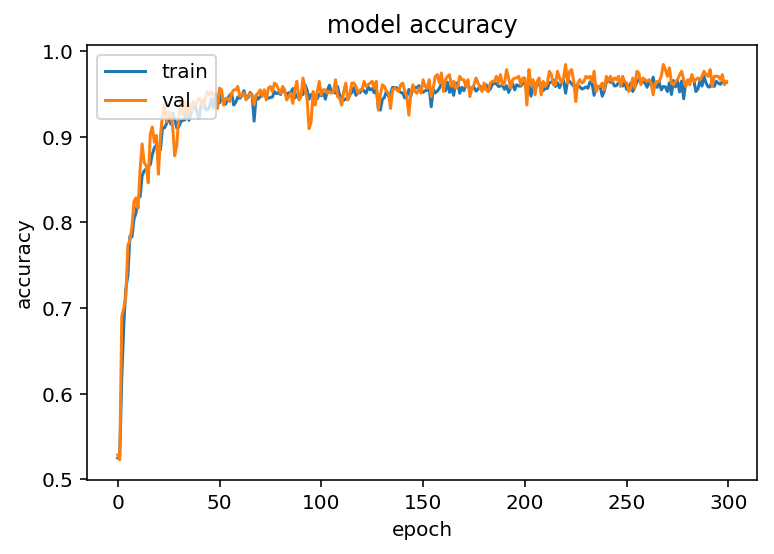

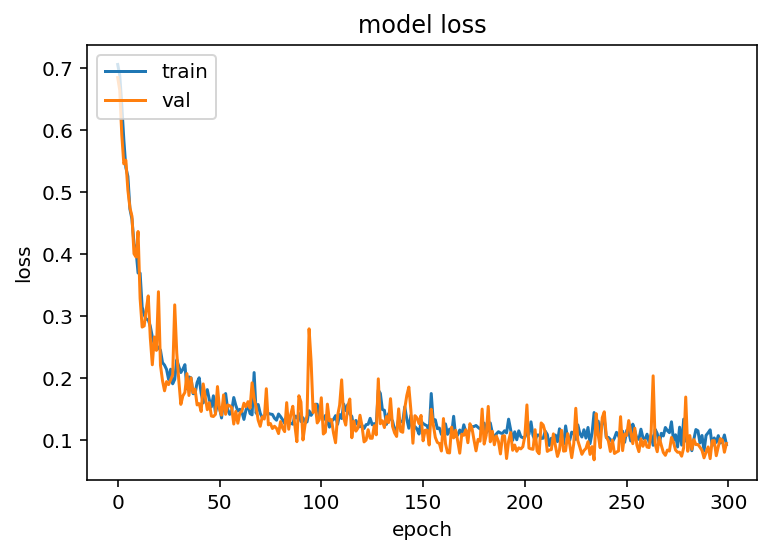

In [37]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot()  
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc']) 
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  
plt.show()  
# summarize history for loss  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  
plt.show()  

----
## 特征的重要性

### 练习 - 提取特征重要性

在下面的代码单元中，使用表现最好的随机森林模型来分析各个特征的重要程度。

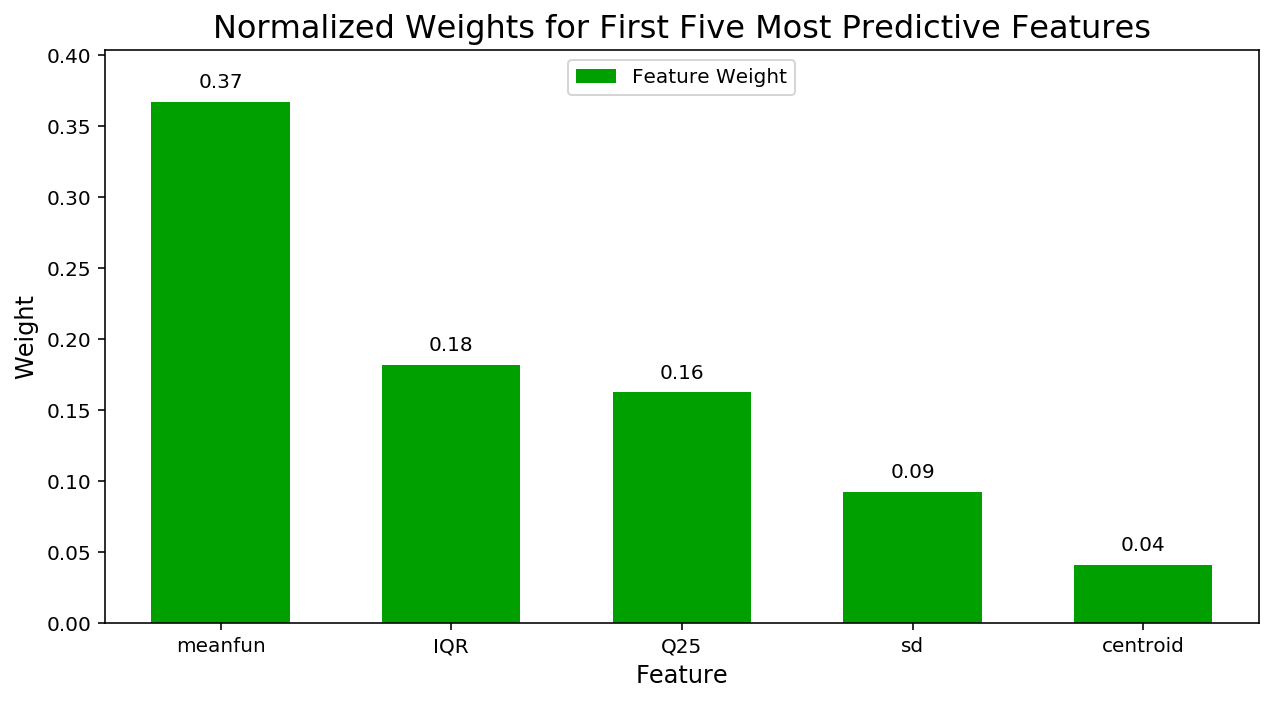

In [38]:
# TODO：导入一个有'feature_importances_'的监督学习模型
from sklearn.ensemble import RandomForestClassifier
# TODO：在训练集上训练一个监督学习模型
model = RandomForestClassifier(n_estimators=10,random_state=10)
model.fit(X_train, y_train)
# TODO： 提取特征重要性
importances = model.feature_importances_

# 绘图
vs.feature_plot(importances, X_train, y_train)

### 在测试集上测试你的模型

下面的代码实现评估模型在测试集的表现。

In [40]:
#TODO test your model on testing data and report accuracy and F score
test_predictions = best_clf.predict(X_test)
test_acc = accuracy_score(y_test, test_predictions)

test_f_score = fbeta_score(y_test, test_predictions, average='macro',beta=0.5)

print "accuracy: %f" % (test_acc)
print "fscore: %f" % (test_f_score)

accuracy: 0.981073
fscore: 0.981109
